# K-means clustering

## import library

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [107]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]
print(feature)
print(x)
print(feature.shape)
number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

[[-2.78158782  6.13851704]
 [-5.79072687  3.00770345]
 [-8.85288476  3.99889271]
 ...
 [ 8.01075285  9.06955099]
 [ 1.12859575 -2.53389057]
 [ 0.03723381  8.87194034]]
[-2.78158782e+00 -5.79072687e+00 -8.85288476e+00 -3.67216533e+00
 -3.67021515e+00 -1.05144286e+01 -8.54949738e+00  1.94045737e+00
  3.65244555e+00  3.70321502e-01 -9.69420098e+00  1.09174399e+00
 -1.47444777e+00  5.58401926e-01 -1.53676402e+00 -5.24384657e+00
 -4.79551352e-02 -1.84469926e+00 -8.88915220e+00 -2.05182018e-01
  2.05214537e+00  1.38754229e+00  5.56187907e-01 -5.32835229e+00
 -7.04085968e+00 -7.53109751e+00 -2.35905817e+00 -1.43503287e+00
  2.83790103e+00 -7.64040174e+00 -4.80086411e+00  5.28748884e+00
  2.59318403e+00  4.07755207e+00 -8.13029171e+00 -2.81427776e+00
 -8.72919829e+00 -8.22060592e+00 -5.67996441e+00  5.25622742e+00
 -7.85932772e+00  4.83203435e+00  2.09417660e+00 -9.12573688e+00
  1.56948446e+00  3.83353428e+00  2.37574897e+00 -4.80705148e+00
  1.01336027e-01 -1.01205511e+01 -1.03166667e+01 -1.

## plot the input data

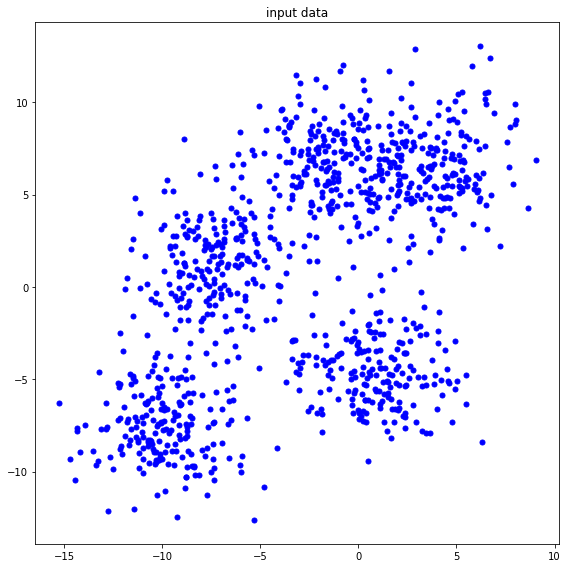

In [108]:
plt.figure(figsize=(8,8))   
plt.title('input data')
plt.scatter(x, y, color='blue', s=25, marker='o')

plt.axis('auto')
plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [109]:
f = np.array([[3,4],[1,2]])
c= np.array([5,6])
dis = (f-c) **2

print(dis)
print(np.sqrt(dis[: ,0] + dis[: ,1]))


[[ 4  4]
 [16 16]]
[2.82842712 5.65685425]


In [110]:
def compute_distance(feature, center):
    distance =(feature - center) ** 2
    distance = distance[:, 0] + distance[:, 1]
    #print(distance.shape)
    #distance = np.sqrt(distance[:, 0] + distance[:, 1])
    return distance 
#compute_distance(feature, [1,2])

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [111]:
def compute_centroid(feature, label_feature, value_label, before_centroid):
    centroid = before_centroid
    cluster_k = np.where(label_feature == value_label)
 
    cluster_k_feature = feature[cluster_k]
    #print(cluster_k_feature)

    #print(len(cluster_k_feature))
    if len(cluster_k_feature) !=0:
        centroid = cluster_k_feature.sum(axis=0) / len(cluster_k_feature)
    return centroid
    
#compute_centroid(np.array([[1,2],[3,4], [4,5]]), np.array([1,2,2]), 2)

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [112]:
def compute_label(distance):
    index_label_feature = np.argmin(distance, axis=1)
    #print(index_label_feature)
    return index_label_feature
tempd = np.array([[10,2,3],[4,5,6]])
compute_label(tempd)


array([1, 0])

In [113]:
def compute_loss(distance):
    print(distance.shape[0])
    return np.sum(distance)/distance.shape[0]

In [114]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 100
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_cluster = np.arange(0,number_cluster,1)
print(label_cluster)
cluster_label_for_feature = np.zeros(number_data)
for i in range(number_data):
    cluster_label_for_feature[i] = np.random.randint(number_cluster)

# ===================================================

[0 1 2 3 4]


[0 1 2 3 4]


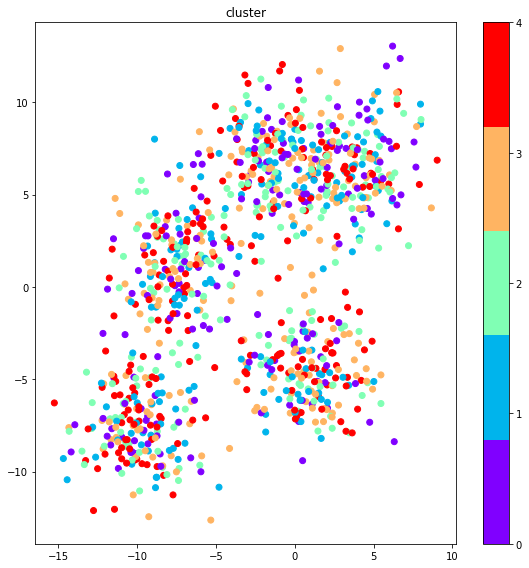

In [115]:
plot_cluster(feature, cluster_label_for_feature, label_cluster)


In [116]:

for i in range(number_iteration):

    for k in range(number_cluster):
        centroid[k] = compute_centroid(feature, cluster_label_for_feature, k, centroid[k])
        #print(centroid[k])
        distance[:,k] = compute_distance(feature, centroid[k])

    cluster_label_for_feature = compute_label(distance)
    #print(distance)
    print(compute_loss(distance))
    loss_iteration[i] = compute_loss(distance)
    centroid_iteration[i] = centroid
#print(cluster_label_for_feature)
#print(centroid)


1000
339.00095035968246
1000
1000
465.59333497367
1000
1000
551.6681848055553
1000
1000
587.9741715568043
1000
1000
594.8095946253937
1000
1000
597.2882272334941
1000
1000
598.0608412182978
1000
1000
600.036277426728
1000
1000
601.3359521882132
1000
1000
602.0565548477216
1000
1000
602.8314515015411
1000
1000
604.2045801242289
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251
1000
1000
604.5766248404251

## plot the results

In [117]:
def plot_data(feature):
    fx = feature[:,0]
    fy = feature[:,1]
    plt.figure(figsize=(8,8))
    plt.title('input data')
    plt.scatter(fx, fy, color='blue', s=25, marker='o')

    plt.axis('auto')
    plt.tight_layout()
    plt.show()

In [118]:
def plot_loss_curve(loss_iteration):
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure

    plt.title('loss')

    plt.plot(range(0, len(loss_iteration)), loss_iteration, '-', color='red')

    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.tight_layout()
    plt.show()

In [119]:
print(centroid_iteration[:, 1][0])

[-2.61011877  0.69152189]


In [120]:

def plot_centroid(centroid_iteration):
    # centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    colordata= {
    0: 'red', 1: 'blue', 2:'green', 3:'orange', 4:'purple', 5:'black', 6:'cyan', 7:'pink', 8: 'magenta', 9: 'yellow'

    }
    

    for i in range(centroid_iteration.shape[1]):
        label_ = r"${cluster=" + str(i) + "}$"
        plt.plot(centroid_iteration[:, i, 0], centroid_iteration[:, i, 1], '-', color=colordata[i], label=label_)
    plt.plot(centroid_iteration[0, : ,0], centroid_iteration[0, : , 1], 'o',color='blue',label='initial')    
    plt.plot(centroid_iteration[len(centroid_iteration)-1, : ,0], centroid_iteration[len(centroid_iteration)-1, : , 1], 's',color='red',label='final')   
    
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

In [121]:
def plot_cluster(feature, label_feature, label_cluster):
    fx = feature[:,0]
    fy = feature[:,1]

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')

    colordata= {
    0: 'red', 1: 'blue', 2:'green', 3:'orange', 4:'purple', 5:'black', 6:'cyan', 7:'pink', 8: 'magenta', 9: 'yellow'
    }
    print(label_cluster)
    cmap = plt.cm.rainbow
    t = plt.scatter(fx,fy, c=label_feature,cmap=plt.cm.get_cmap('rainbow', len(label_cluster)))
    #for i in range(len(label_cluster)):
    #    clu_where = np.where(label_feature == i)
    #    t = plt.scatter(fx[clu_where], fy[clu_where], color=colordata[i] ,s=15)
    #    tlist.append(t)
    
    plt.colorbar(t, ticks=np.linspace(0,9,10))
    plt.tight_layout()


    plt.show()


[0 1 2 3 4]


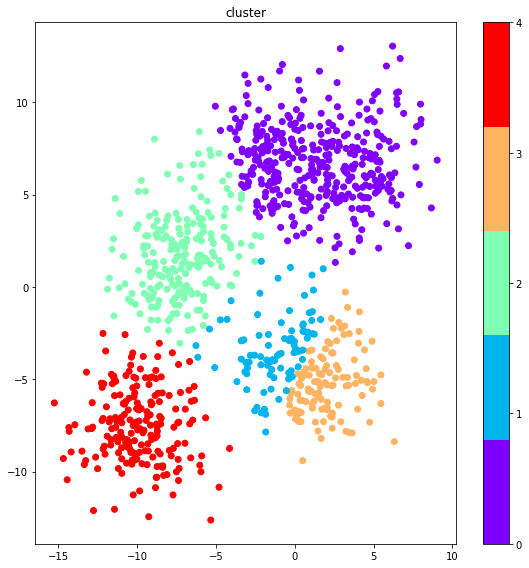

In [122]:
plot_cluster(feature, cluster_label_for_feature, label_cluster)

***

# results

***

1. plot the input data

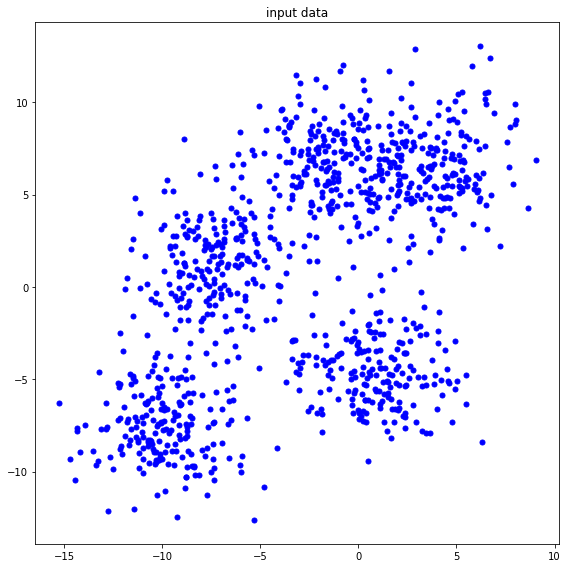

In [123]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

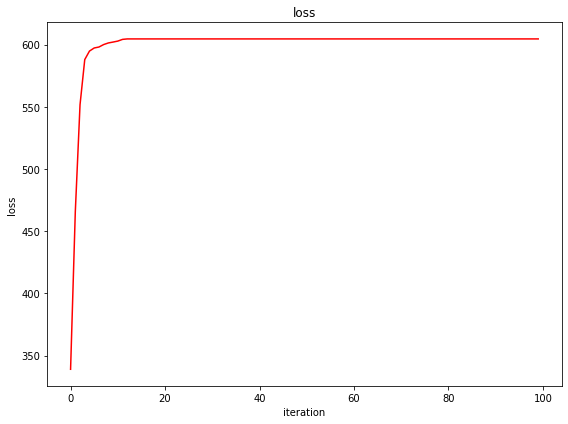

In [124]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

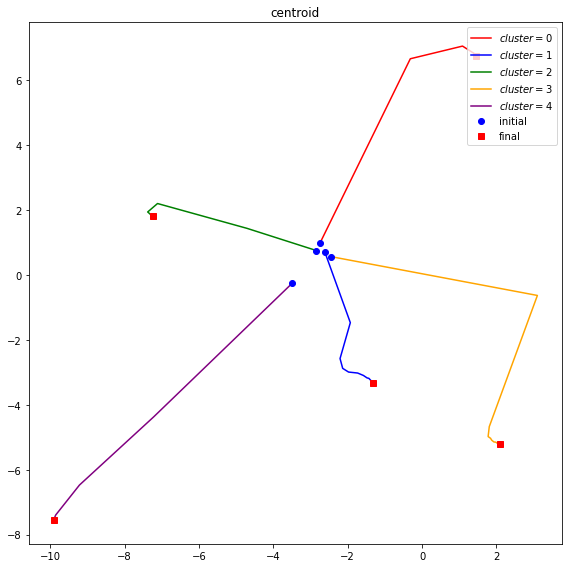

In [125]:
plot_centroid(centroid_iteration)

4. plot the final clustering result with the number of clusters being 5

[0 1 2 3 4]


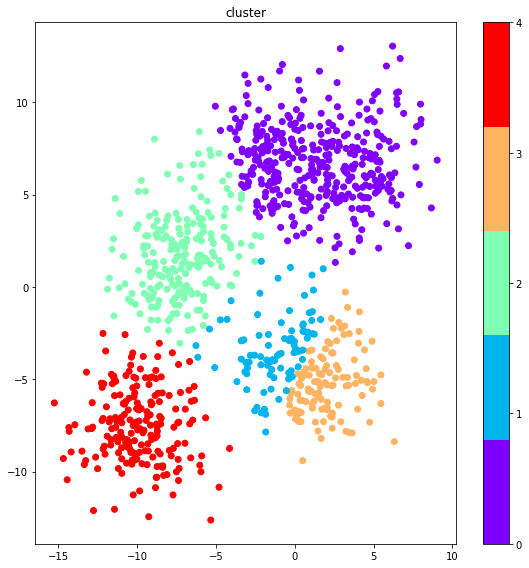

In [126]:
plot_cluster(feature, cluster_label_for_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

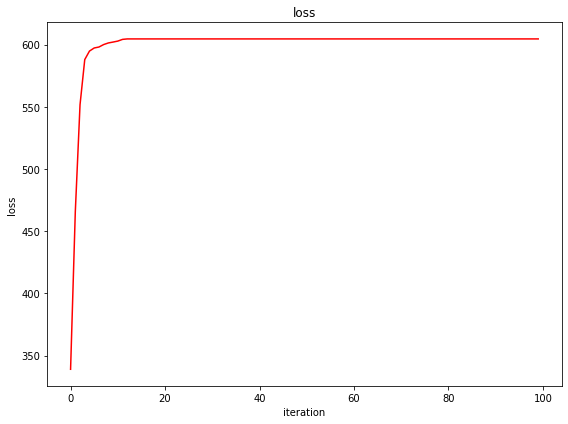

In [127]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

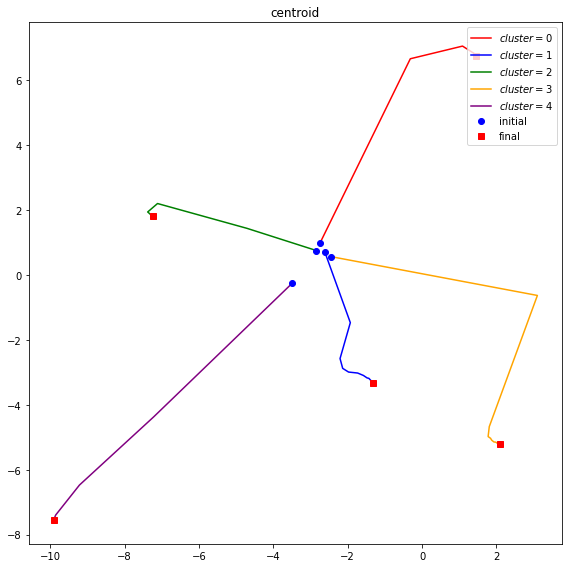

In [128]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

[0 1 2 3 4]


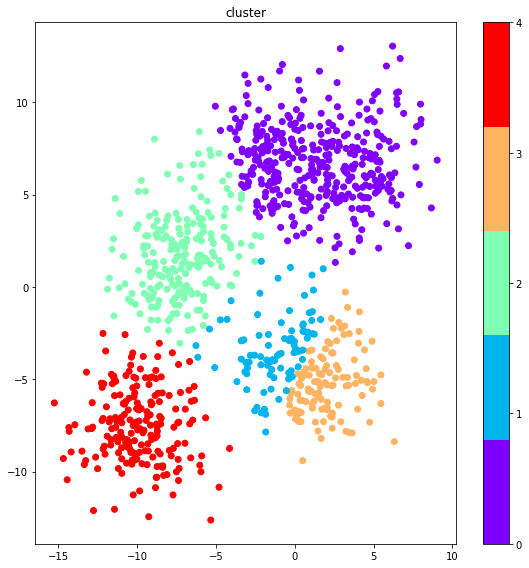

In [129]:
plot_cluster(feature, cluster_label_for_feature, label_cluster)

***